<a href="https://colab.research.google.com/github/malofeevakate/AB_test_ANOWA_research/blob/main/AB_test_ANOWA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [ ]:
# считаем данные о реакциях на разные форматы фото в нашем приложении
df = pd.read_csv('5_task_1.csv')

In [ ]:
df

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [ ]:
# проверим данные внутри групп на гомоскедастичность
pg.homoscedasticity(df, dv = 'events', group = 'group', method = 'levene', alpha = 0.05)

,W,pval,equal_var
levene,2.26226,0.104133,True


In [ ]:
# проверим данные внутри групп на нормальность
pg.normality(df, dv = 'events', method = 'normaltest', group = 'group')

,W,pval,normal
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


In [ ]:
# так как недостаточно оснований отклонить гипотезы о нормальности данных и гомоскедастичности дисперсий, проведем дисперсионный анализ
pg.anova(data = df, dv = 'events', between = 'group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


In [ ]:
# P < 0.05, есть основания отклонить нулевую гипотезу (то есть между группами имеются значимые различия)
# сравним попарно средние, используя критерий Тьюки

pg.pairwise_tukey(df, dv = 'events', between = 'group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.001,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.001,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.001,1.018089


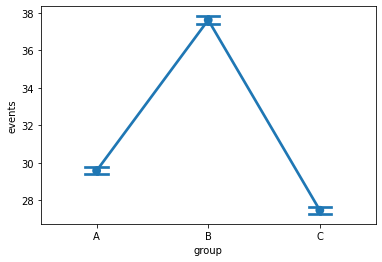

In [ ]:
# p < 0,05, значит, между всеми группами имеются статзначимые различия
# построим визуализацию и выберем предпочтительный вариант

sns.pointplot(x = 'group', y = 'events', data = df, capsize = 0.2)

In [ ]:
# считаем данные о реакциях на разный вид кнопки заказа
df_button = pd.read_csv('5_task_2.csv')

In [ ]:
df_button

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента. Поскольку у нас есть несколько переменных - зависимая (число событий) и два независимых фактора (сегмент клиента и его группа) - используем многофакторный ANOVA

In [ ]:
# выделим тестовые значения из датафрейма
df_button_test = df_button.query('group == "test"')

In [ ]:
# выделим контрольные занчения из датафрейма
df_button_control = df_button.query('group == "control"')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


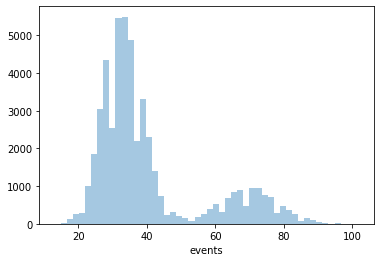

In [ ]:
# посмотрим на распределение реакций в тестовой группе
sns.distplot(df_button_test.events, kde = False)

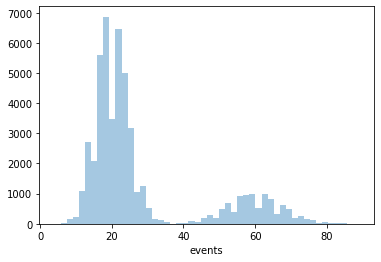

In [ ]:
# посмотрим на распределение реакций в контрольной группе
sns.distplot(df_button_control.events, kde = False)

In [ ]:
df_button_test.query('segment == "high"').events.describe()

count    10000.000000
mean        69.938500
std          8.403974
min         40.000000
25%         64.000000
50%         70.000000
75%         76.000000
max        102.000000
Name: events, dtype: float64

In [ ]:
# выведем описательные статистики для каждого сегмента в каждой группе
df_button_test.query('segment == "low"').events.describe()

count    40000.000000
mean        33.025925
std          5.720845
min         13.000000
25%         29.000000
50%         33.000000
75%         37.000000
max         59.000000
Name: events, dtype: float64

In [ ]:
# выведем описательные статистики для каждого сегмента в каждой группе
df_button_control.query('segment == "high"').events.describe()

count    10000.000000
mean        59.970800
std          7.805347
min         31.000000
25%         55.000000
50%         60.000000
75%         65.000000
max         89.000000
Name: events, dtype: float64

In [ ]:
# выведем описательные статистики для каждого сегмента в каждой группе
df_button_control.query('segment == "low"').events.describe()

count    40000.000000
mean        20.031575
std          4.473576
min          4.000000
25%         17.000000
50%         20.000000
75%         23.000000
max         41.000000
Name: events, dtype: float64

In [ ]:
# для проведения анализа создадим доп колонку с объединением данных о группе и сегменте клиента
df_button['comb'] = df_button.group + '/' + df_button.segment

In [ ]:
df_button.head()

,id,group,segment,events,comb
0,83440,test,high,78.0,test/high
1,96723,test,high,71.0,test/high
2,68719,test,high,80.0,test/high
3,50399,test,high,80.0,test/high
4,95613,test,high,78.0,test/high


In [ ]:
# ANOVA говорит, что среди указанных 4 подгрупп наблюдаются значимые различия
pg.anova(df_button, dv = 'events', between = 'comb')

,Source,ddof1,ddof2,F,p-unc,np2
0,comb,3,99996,267619.354959,0.0,0.889245


In [ ]:
# из-за множественных сравнений применим критерий Тьюки и определим, между какими подгруппами имеются зачимые различия
pg.pairwise_tukey(df_button, dv = 'events', between = 'comb')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control/high,control/low,59.970800,20.031575,39.939225,0.065432,610.391461,0.001,6.824282
1,control/high,test/high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.001,-1.703109
2,control/high,test/low,59.970800,33.025925,26.944875,0.065432,411.798717,0.001,4.603981
3,control/low,test/high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.001,-8.527429
4,control/low,test/low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.001,-2.220314
5,test/high,test/low,69.938500,33.025925,36.912575,0.065432,564.135148,0.001,6.307128


Text(0, 0.5, 'Среднее по реакциям')

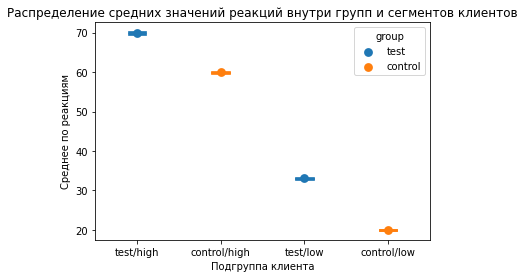

In [ ]:
# визуализируем средние внутри подгрупп
sns.pointplot(x = 'comb', y = 'events', hue = 'group', data = df_button, capsize = .2)
plt.title('Распределение средних значений реакций внутри групп и сегментов клиентов')
plt.xlabel('Подгруппа клиента')
plt.ylabel('Среднее по реакциям')

Итого, мы наблюдаем стат значимые различия между всеми подгруппами, при этом средние в тестовых подгруппах выше, чем в контрольных (в обоих клиентских сегментах).  Соответственно, имеется достаточно оснований выкатить новый дизайн кнопки и фото на всю клиентскую базу